In [1]:
import pandas as pd
import numpy as np
import random
import math
from faker import Faker

# Employee 

In [96]:
genders = ['male', 'female']
female_names = ['Adelheid', 'Anneliese', 'Beatrix', 'Caroline', 'Dorothea', 'Elisabeth', 'Frieda', 'Gabriele',
                'Heidi', 'Ingrid', 'Johanna', 'Katharina', 'Lieselotte', 'Margarete', 'Nadja', 'Olga', 'Petra',
                'Regina', 'Sabine', 'Theresa', 'Ursula', 'Verena', 'Wilhelmina', 'Xenia', 'Yvonne', 'Zelda']
male_names = ['Albrecht', 'Bernd', 'Carl', 'Dieter', 'Ernst', 'Friedrich', 'Gustav', 'Heinrich', 'Ingo', 'Johann',
              'Klaus', 'Ludwig', 'Matthias', 'Niklas', 'Otto', 'Paul', 'Rainer', 'Sebastian', 'Theodor', 'Ulrich',
              'Valentin', 'Werner', 'Xaver', 'Yannick', 'Zacharias']
last_names = ["Müller", "Schmidt", "Schneider", "Fischer", "Meyer", "Weber", "Wagner", "Becker", "Schulz",
              "Hoffmann", "Schäfer", "Koch", "Bauer", "Richter", "Klein", "Wolf", "Schröder", "Neumann", "Schwarz",
              "Zimmermann"]
email_domain = ['google.com', 'yahoo.com', 'hotmail.com', 'outlook.com', 'web.de', 'gmx.de', 'aol.com', 'mail.com',
                't-online.de', 'freenet.de']
streets = ["Hauptstraße", "Bahnhofstraße", "Schulstraße", "Kirchstraße", "Gartenstraße", "Dorfstraße", "Bergstraße",
           "Lindenstraße", "Bachstraße", "Feldstraße", "Goethestraße", "Schillerstraße", "Ringstraße", "Bismarckstraße",
           "Bergstraße", "Hermannstraße", "Mozartstraße", "Schubertstraße", "Lerchenweg", "Am Sportplatz", "Im Winkel",
           "Am Kirchplatz", "Am Anger", "Am Weinberg", "Goethestraße", "Schillerstraße", "Schulweg", "Am Wiesenhang",
           "Am Mühlbach", "Am Mühlweg", "Am Weiher", "Am Markt", "Am Schloß", "Bergstraße", "Birkenweg", "Blumenstraße",
           "Brunnenstraße", "Buchenweg", "Bürgermeisterstraße", "Drosselweg", "Eichenweg", "Finkenweg", "Fliederweg",
           "Friedhofstraße", "Friedrichstraße", "Gartenstraße", "Goethestraße", "Hauptstraße", "Heckenweg", "Heideweg",
           "Hermann-Löns-Weg", "Hindenburgstraße", "Hochstraße", "Höhenweg", "Im Winkel", "Jahnstraße", "Kastanienweg",
           "Kirchstraße"]
cities = ["Berlin", "Hamburg", "München", "Köln", "Frankfurt am Main", "Stuttgart", "Düsseldorf", "Dortmund", "Essen"]


In [102]:
import pandas as pd
import numpy as np


def fill_employee_table(num_rows):
    employee_columns = ['id', 'first_name', 'last_name', 'birthday', 'gender', 'email', 'phone_number', 'hire_date',
                        'role', 'salary']
    employee_dataframe = pd.DataFrame(columns=employee_columns)

    roles = ['ETF Consultant', 'ETF Specialist', 'Marketing Specialist', ]
    roles_distribution = [0.7, 0.15, 0.15]

    # Fill the dataframe with 3 consultants, 1 specialist, 1 marketing, and 1 owner
    for i in range(num_rows):

        # make 3 consultants and 1 specialist and 1 marketing and 1 owner
        if i < 3:
            role = 'ETF Consultant'
        elif i == 3:
            role = 'ETF Specialist'
        elif i == 4:
            role = 'Marketing Specialist'

        gender = random.choice(genders)
        if gender == 'male':
            first_name = random.choice(male_names)
        else:
            first_name = random.choice(female_names)
        last_name = random.choice(last_names)
        birthday = Faker().date_of_birth(tzinfo=None, minimum_age=18, maximum_age=65)
        email = first_name.lower() + '.' + last_name.lower() + '@' + random.choice(email_domain)
        # make german phone number
        phone_number = f'+49 {random.randint(100, 199)} {random.randint(1000000, 9999999)}'
        hire_date = Faker().date_between(start_date='-10y', end_date='today')
        salary = random.randint(50000, 80000)
        # female should get less money
        salary *= 0.8 if gender == "female" else 1
        salary = math.floor(salary / 1000) * 1000  # round to 1000
        # modify salary based on role
        roles_salary = {'ETF Consultant': 0.8, 'ETF Specialist': 1.0, 'Marketing Specialist': 1.2,
                        'Business Owner': 1.5}
        salary *= roles_salary[role]
        # Add the employee to the dataframe
        employee_dataframe.loc[i] = [i, first_name, last_name, birthday, gender, email, phone_number, hire_date, role,
                                     salary]

    return employee_dataframe

In [104]:
employee_dataframe = fill_employee_table(5)
employee_dataframe

,id,first_name,last_name,birthday,gender,email,phone_number,hire_date,role,salary
0,0,Heidi,Schmidt,1995-07-21,female,heidi.schmidt@web.de,+49 146 5462231,2022-12-14,ETF Consultant,36000.0
1,1,Bernd,Koch,1999-10-29,male,bernd.koch@t-online.de,+49 135 4305710,2021-10-28,ETF Consultant,60800.0
2,2,Valentin,Schäfer,1971-03-15,male,valentin.schäfer@outlook.com,+49 163 9131587,2015-11-11,ETF Consultant,42400.0
3,3,Paul,Meyer,1972-08-03,male,paul.meyer@google.com,+49 170 7234306,2022-02-16,ETF Specialist,51000.0
4,4,Caroline,Wagner,2001-07-31,female,caroline.wagner@web.de,+49 191 4469593,2018-03-27,Marketing Specialist,61200.0


# Customer

In [105]:
phone_prefix = {
    'Albania': '+355',
    'Andorra': '+376',
    'Austria': '+43',
    'Belarus': '+375',
    'Belgium': '+32',
    'Bosnia and Herzegovina': '+387',
    'Bulgaria': '+359',
    'Croatia': '+385',
    'Cyprus': '+357',
    'Czechia': '+420',
    'Denmark': '+45',
    'Estonia': '+372',
    'Finland': '+358',
    'France': '+33',
    'Germany': '+49',
    'Greece': '+30',
    'Hungary': '+36',
    'Iceland': '+354',
    'Ireland': '+353',
    'Italy': '+39',
    'Kosovo': '+383',
    'Latvia': '+371',
    'Liechtenstein': '+423',
    'Lithuania': '+370',
    'Luxembourg': '+352',
    'Malta': '+356',
    'Moldova': '+373',
    'Monaco': '+377',
    'Montenegro': '+382',
    'Netherlands': '+31',
    'North Macedonia': '+389',
    'Norway': '+47',
    'Poland': '+48',
    'Portugal': '+351',
    'Romania': '+40',
    'Russia': '+7',
    'San Marino': '+378',
    'Serbia': '+381',
    'Slovakia': '+421',
    'Slovenia': '+386',
    'Spain': '+34',
    'Sweden': '+46',
    'Switzerland': '+41',
    'Ukraine': '+380',
    'United Kingdom': '+44',
    'Vatican City': '+379'
}

In [106]:
def fill_client_tables(num_rows):
    faker = Faker()
    client_columns = ['id', 'first_name', 'last_name', 'birthday', 'gender', 'adress', 'country', 'email',
                      'phone_number']
    client_dataframe = pd.DataFrame(columns=client_columns)

    for i in range(num_rows):
        gender = random.choice(genders)
        if gender == 'male':
            first_name = faker.first_name_male()
        else:
            first_name = faker.first_name_female()
        last_name = faker.last_name()
        birthday = faker.date_of_birth(tzinfo=None, minimum_age=18, maximum_age=65)
        adress = faker.street_address()
        country = random.choice(list(phone_prefix.keys()))
        email = first_name.lower() + '.' + last_name.lower() + '@' + random.choice(email_domain)
        phone_number = phone_prefix[country] + ' ' + str(random.randint(100, 199)) + ' ' + str(
            random.randint(1000000, 9999999))

        client_dataframe.loc[i] = [i, first_name, last_name, birthday, gender, adress, country, email,
                                   phone_number]
    return client_dataframe

In [108]:
client_dataframe = fill_client_tables(7000)
client_dataframe

,id,first_name,last_name,birthday,gender,adress,country,email,phone_number
0,0,Melinda,Robles,1966-05-22,female,758 King Mountains Suite 495,Bosnia and Herzegovina,melinda.robles@freenet.de,+387 104 9788376
1,1,Brandon,Jones,1969-01-26,male,225 Wilson Curve,Lithuania,brandon.jones@google.com,+370 174 8213328
2,2,Anne,Baird,1994-06-09,female,6810 Brianna Loaf Apt. 408,France,anne.baird@google.com,+33 183 1728414
3,3,Tina,Rocha,1985-02-02,female,3268 Lewis Points Suite 985,Serbia,tina.rocha@outlook.com,+381 156 7817956
4,4,Megan,Miller,1974-12-01,female,065 Powell Shoals,Cyprus,megan.miller@outlook.com,+357 140 5065362
...,...,...,...,...,...,...,...,...,...
6995,6995,James,Ramirez,1960-06-28,male,020 William Dam Apt. 118,Italy,james.ramirez@outlook.com,+39 175 5901835
6996,6996,Jenna,Le,1992-02-02,female,410 Robertson Glens Suite 571,Romania,jenna.le@outlook.com,+40 131 4946608
6997,6997,John,Bennett,1989-04-07,male,938 Jimenez Street,Liechtenstein,john.bennett@hotmail.com,+423 184 6581688
6998,6998,Jodi,Perez,2003-02-03,female,2744 Mcdonald Harbors Apt. 525,Latvia,jodi.perez@outlook.com,+371 169 2289326



# Consulation

In [159]:
# get all employee ids that are consultants
employee_id = employee_dataframe[employee_dataframe['role'] == 'ETF Consultant']['id'].to_list()
client_length = len(client_dataframe)

costs ={1:100, 2:190, 3:270, 4:340, 5:400}

def fill_consultion_table(num_rows):
    df_columns = ['id', 'employee_id', 'client_id', 'date', 'duration', 'cost']
    df = pd.DataFrame(columns=df_columns)

    for i in range(num_rows):
        employee = np.random.choice(employee_id)
        client = random.randint(0, client_length - 1)
        date = Faker().date_between(start_date='-5y', end_date='today')
        # duration and cost are correlated
        duration = random.randint(1, 4)
        # make longer consultations have a discount if longer than 1 hour
        cost = costs[duration]
        df.loc[i] = [i, employee, client, date, duration, cost]
    return df

In [160]:
consultation_dataframe = fill_consultion_table(10000)
consultation_dataframe

,id,employee_id,client_id,date,duration,cost
0,0,1,26,2019-03-01,1,100
1,1,0,4822,2020-10-07,1,100
2,2,1,3586,2022-06-12,3,270
3,3,0,3345,2019-11-07,3,270
4,4,1,2666,2021-08-24,3,270
...,...,...,...,...,...,...
9995,9995,1,6817,2021-01-11,4,340
9996,9996,0,3699,2021-11-21,2,190
9997,9997,1,1687,2021-12-19,3,270
9998,9998,0,1189,2019-08-15,2,190


In [161]:
# get cost per month but the date is in 

date
2018-10-31    1890
2018-11-01    1820
2018-11-02     930
2018-11-03     770
2018-11-04    1180
              ... 
2023-10-27    1460
2023-10-28    1790
2023-10-29    1530
2023-10-30    1780
2023-10-31    1100
Name: cost, Length: 1820, dtype: int64

# Transaction

In [162]:
df_symbols = pd.read_csv('data/listing_status_etf.csv', sep=';')
symbols = df_symbols['symbol'].to_list()
symbols

['AAXJ',
 'ACWI',
 'ACWV',
 'ACWX',
 'AFTY',
 'ANEW',
 'ARGT',
 'ASEA',
 'ASHX',
 'BBRE',
 'BKF',
 'BRZU',
 'BZQ',
 'CHIC',
 'CHIE',
 'CHIH',
 'CHII',
 'CHIK',
 'CHIM',
 'CHIQ',
 'CHIR',
 'CHIS',
 'CHIU',
 'CHIX',
 'CN',
 'CNYA',
 'CRBN',
 'CUT',
 'CWI',
 'DBAW',
 'DBEF',
 'DBEM',
 'DBEU',
 'DBEZ',
 'DBGR',
 'DBJP',
 'DEEF',
 'DMXF',
 'DPK',
 'DSI',
 'EASG',
 'ECH',
 'ECNS',
 'EDEN',
 'EDZ',
 'EEM',
 'EEMA',
 'EEMS',
 'EEMV',
 'EEMX',
 'EET',
 'EEV',
 'EFA',
 'EFAD',
 'EFAS',
 'EFAV',
 'EFAX',
 'EFG',
 'EFNL',
 'EFO',
 'EFU',
 'EFV',
 'EFZ',
 'EGUS',
 'EIDO',
 'EIRL',
 'EIS',
 'EMDV',
 'EMFM',
 'EMSG',
 'EMXC',
 'EMXF',
 'ENOR',
 'ENZL',
 'EPHE',
 'EPOL',
 'EPP',
 'EPU',
 'EPV',
 'ERTH',
 'ESGD',
 'ESGE',
 'ESGU',
 'ESML',
 'ESMV',
 'EUDV',
 'EUFN',
 'EUM',
 'EURL',
 'EUSA',
 'EVUS',
 'EWA',
 'EWC',
 'EWD',
 'EWG',
 'EWGS',
 'EWH',
 'EWI',
 'EWJ',
 'EWJV',
 'EWK',
 'EWL',
 'EWM',
 'EWN',
 'EWO',
 'EWP',
 'EWQ',
 'EWS',
 'EWT',
 'EWU',
 'EWUS',
 'EWV',
 'EWW',
 'EWY',
 'EWZ',
 'EWZS',
 

<Axes: ylabel='Count'>

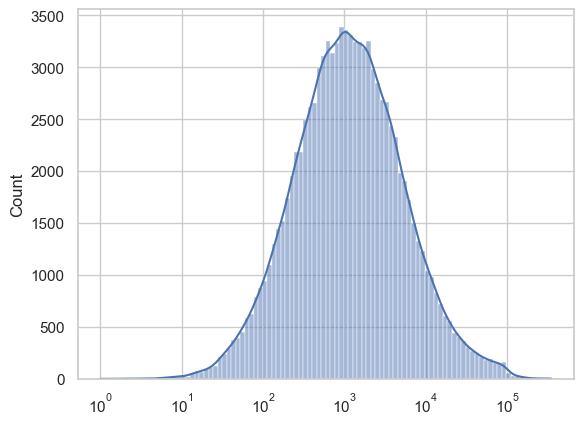

In [163]:
import numpy as np


def generate_amount():
    n = 100
    # Generate log-normal distribution with mean 6 and standard deviation 1.5
    values = np.random.lognormal(7, 1.5, n)
    # Set minimum value to 0
    values = np.maximum(values, 0)
    # Add outliers up to 100000
    outliers = np.random.randint(100000, size=1)
    values = np.concatenate((values, outliers))
    # Shuffle the values
    np.random.shuffle(values)
    return int(values[0])


values = []
for i in range(100000):
    values.append(generate_amount())

import seaborn as sns

# Plot the values using seaborn
sns.set_style("whitegrid")
sns.histplot(values, bins=100, kde=True, log_scale=True)

In [164]:
# distribution of transaction types (buy, sell)
transaction_types = ['buy', 'sell']
transaction_types_distribution = [0.8, 0.2]
# distribution of (yearly,quarterly,monthly)
transaction_frequency = ['yearly', 'quarterly', 'monthly']
transaction_frequency_distribution = [0.1, 0.3, 0.6]

# how many etfs each client has
etf_per_client = [1, 2, 3, 4, 5]
etf_per_client_distribution = [0.1, 0.2, 0.3, 0.2, 0.2]

client_length = 100

client_etfs = {}
for client in range(client_length):
    etfs = []
    for i in range(np.random.choice(etf_per_client, p=etf_per_client_distribution)):
        symbol = random.choice(symbols)
        frequency = np.random.choice(transaction_frequency, p=transaction_frequency_distribution)
        # random amount between 100 and 100000 that follows a distribution that is skewed to the left
        amount = generate_amount()

        # split the amount by 3 if the frequency is quarterly by 12 if the frequency is monthly 
        if frequency == 'quarterly':
            amount /= 3
        elif frequency == 'monthly':
            amount /= 12
        amount = math.ceil(amount / 100) * 100  # round to 100

        etfs.append((symbol, amount, frequency))
    client_etfs[client] = etfs


def fill_transaction_table(num_clients):
    df_columns = ['id', 'client_id', 'etf_id', 'date', 'type', 'amount', 'frequency']
    df = pd.DataFrame(columns=df_columns)

    index = 0
    for client in range(num_clients):
        etfs = client_etfs[client]
        starting_date = Faker().date_between(start_date='-5y', end_date='today')
        etf_balance = {etf[0]: 0 for etf in etfs}
        for etf in etfs:
            # how many days there are between the starting date and today
            days = (pd.Timestamp.today() - pd.Timestamp(starting_date)).days
            # how many transactions there where until today
            frequency = etf[2]

            # calculate how many transactions there where
            if frequency == 'yearly':
                transactions = days // 365 + 1
            elif frequency == 'quarterly':
                transactions = days // 90 + 1
            elif frequency == 'monthly':
                transactions = days // 30 + 1
            else:
                raise Exception('Frequency not supported')

            # make sure there is at least one transaction
            transactions = max(1, transactions)
            for transaction in range(transactions):
                # get the date of the transaction based on the frequency and the starting date
                date = starting_date + pd.DateOffset(years=transaction) if frequency == 'yearly' else \
                    starting_date + pd.DateOffset(months=transaction) if frequency == 'monthly' else \
                        starting_date + pd.DateOffset(months=3 * transaction)
                # get the type of the transaction
                transaction_type = np.random.choice(transaction_types, p=transaction_types_distribution)
                if etf_balance[etf[0]] == 0:
                    transaction_type = 'buy'

                amount = random.randint(1, etf_balance[etf[0]] // 10) if transaction_type == 'sell' else etf[1]
                # update the balance
                etf_balance[etf[0]] += amount if transaction_type == 'buy' else -amount

                df.loc[index] = [index, client, etf[0], date, transaction_type, amount, frequency]

                index += 1
    return df

In [165]:
transactions = fill_transaction_table(client_length)
transactions

,id,client_id,etf_id,date,type,amount,frequency
0,0,0,SIZE,2021-12-25,buy,400,monthly
1,1,0,SIZE,2022-01-25,buy,400,monthly
2,2,0,SIZE,2022-02-25,sell,25,monthly
3,3,0,SIZE,2022-03-25,buy,400,monthly
4,4,0,SIZE,2022-04-25,buy,400,monthly
...,...,...,...,...,...,...,...
6851,6851,99,DBEU,2023-08-05,buy,300,monthly
6852,6852,99,DBEU,2023-09-05,buy,300,monthly
6853,6853,99,DBEU,2023-10-05,buy,300,monthly
6854,6854,99,FXP,2023-08-05,buy,200,yearly


[('SIZE', 400, 'monthly'), ('USVM', 1200, 'monthly'), ('ULVM', 100, 'monthly'), ('EFV', 100, 'monthly')]


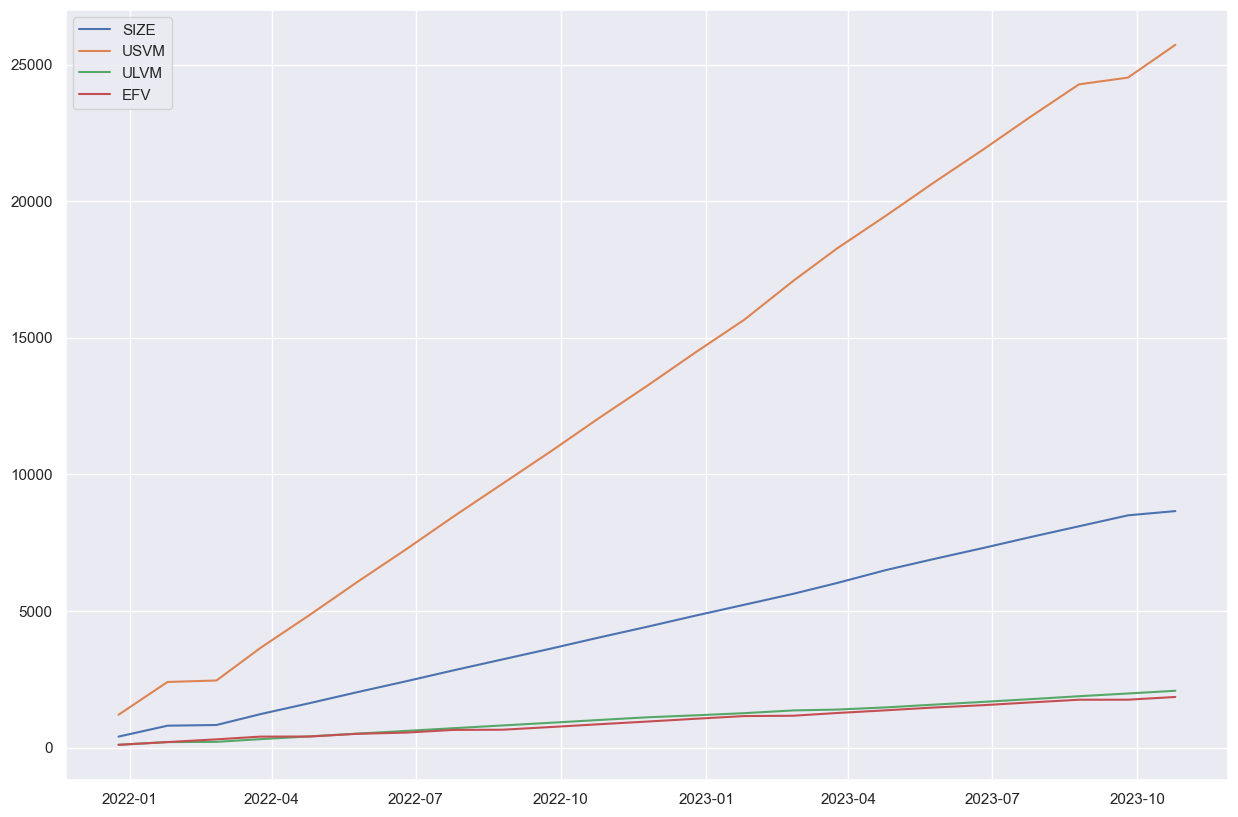

In [168]:

import seaborn as sns
import matplotlib.pyplot as plt

# plot the balance of the etfs over time

client_id = 0
# get the etfs of the first client
etfs = client_etfs[client_id]
print(etfs)
# get the transactions of the first client
selected_transactions = transactions[transactions['client_id'] == client_id]
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 10))
for etf in etfs:
    # get the transactions of the current etf
    etf_transactions = selected_transactions[selected_transactions['etf_id'] == etf[0]]
    # get the balance of the etf over time
    etf_balance = etf_transactions.groupby('date').sum()['amount'].cumsum()
    # plot the balance
    ax.plot(etf_balance, label=etf[0])

ax.legend()
plt.show()


# Cost

In [3]:
employee_dataframe = pd.read_csv('data/employee.csv', sep=';')

In [6]:
# generate cost for each employee

# random date 6 years ago
starting_month = random.randint(1, 12)


# amount of months between start date and today

def generate_german_iban():
    # Germany country code and check digits
    country_code = "DE"
    check_digits = str(random.randint(0, 9)) + str(random.randint(0, 9))

    # Generate a random domestic account number (20 digits)
    account_number = ''.join([str(random.randint(0, 9)) for _ in range(20)])

    # Combine the parts to form the complete IBAN
    iban = country_code + check_digits + account_number

    return iban


# generate random Bank Account Number for each employee
targets = [generate_german_iban() for i in range(len(employee_dataframe))]
# generate Bank Account Number for power, water, internet, rent
expenses = [
    {"expense": "Rent", "cost": 1500},  # Monthly rent for the office space
    {"expense": "Utilities", "cost": 250},  # Monthly utilities (electricity, water, heating, internet)
    {"expense": "Equipment and Supplies", "cost": 100},  # Cost of office equipment and supplies
    {"expense": "Taxes", "cost": 800},  # Estimated monthly taxes (corporate income tax, trade tax, VAT)
    {"expense": "Insurance", "cost": 300},  # Monthly insurance costs
    {"expense": "Marketing and Advertising", "cost": 500},  # Monthly marketing and advertising expenses
    {"expense": "Accounting and Legal Fees", "cost": 400},  # Monthly accounting and legal fees
    {"expense": "Transportation", "cost": 150},  # Monthly transportation expenses
    {"expense": "Miscellaneous Expenses", "cost": 200},  # Miscellaneous monthly expenses
    {"expense": "Software and Technology", "cost": 300},  # Monthly software and technology costs
    {"expense": "Training and Development", "cost": 250},  # Monthly training and development expenses
    {"expense": "Contingency and Growth Funds", "cost": 500},  # Set aside for unexpected expenses and growth
]

expenses_target = [generate_german_iban() for i in range(len(expenses))]

# get cost for each employee per month
employee_cost = [employee_dataframe['salary'][employee] for employee in employee_dataframe['id']]

df_cost_columns = ['id', 'date', 'cost', 'reason', 'target']
df_cost = pd.DataFrame(columns=df_cost_columns)

id = 0
# add cost for each employee per month starting from the start date
for employee in employee_dataframe['id']:
    for month in range(72):
        date = pd.Timestamp.today() - pd.DateOffset(months=month)
        # formats as YYYY-MM-DD
        date = date.strftime("%Y-%m-%d")
        cost = employee_cost[employee] / 12
        cost = round(cost, 2)
        reason = 'Salary'
        target = targets[employee]
        df_cost.loc[len(df_cost)] = [id, date, cost, reason, target]
        id += 1

# add cost for each expense per month starting from the start date
for expense in expenses:
    for month in range(72):
        date = pd.Timestamp.today() - pd.DateOffset(months=month)
        date = date.strftime("%Y-%m-%d")
        cost = expense['cost']
        # each year the cost increases by 2%
        cost /= 1.02 ** (month // 12)
        reason = expense['expense']
        df_cost.loc[len(df_cost)] = [id, date, cost, reason,
                                     expenses_target[expenses.index(expense)]]
        id += 1




In [7]:
df_cost

,id,date,cost,reason,target
0,0,2023-11-01,3000.000000,Salary,DE8853436021080566243259
1,1,2023-10-01,3000.000000,Salary,DE8853436021080566243259
2,2,2023-09-01,3000.000000,Salary,DE8853436021080566243259
3,3,2023-08-01,3000.000000,Salary,DE8853436021080566243259
4,4,2023-07-01,3000.000000,Salary,DE8853436021080566243259
...,...,...,...,...,...
1219,1219,2018-04-01,452.865405,Contingency and Growth Funds,DE2944506635666932327586
1220,1220,2018-03-01,452.865405,Contingency and Growth Funds,DE2944506635666932327586
1221,1221,2018-02-01,452.865405,Contingency and Growth Funds,DE2944506635666932327586
1222,1222,2018-01-01,452.865405,Contingency and Growth Funds,DE2944506635666932327586


In [171]:
# cost per month
df_cost.groupby('date').sum()['cost']


date
2017-12-01    25705.086752
2018-01-01    25705.086752
2018-02-01    25705.086752
2018-03-01    25705.086752
2018-04-01    25705.086752
                  ...     
2023-07-01    26200.000000
2023-08-01    26200.000000
2023-09-01    26200.000000
2023-10-01    26200.000000
2023-11-01    26200.000000
Name: cost, Length: 72, dtype: float64

In [172]:
# save to csv
employee_dataframe.to_csv('data/employee.csv', index=False, sep=';')
client_dataframe.to_csv('data/client.csv', index=False, sep=';')
consultation_dataframe.to_csv('data/consultation.csv', index=False, sep=';')
transactions.to_csv('data/transaction.csv', index=False, sep=';')
df_cost.to_csv('data/cost.csv', index=False, sep=';')